In [2]:
import os
import csv
import pandas as pd
import plotly.express as px

EARTHQUAKE_PATH = "datasets/earthquakes.csv"
MAPBOX_ACCESS_KEY = "pk.eyJ1IjoibWFya21pbmtvZmYiLCJhIjoiY2tmcGxuOHBrMDBxNTJwb2VmMXFxOG0wMCJ9.pvvC0x4DbywnR3_mfi-3hw"

# READ EARTHQUAKE CSV FILE
def load_earthquake_data(earthquake_path = EARTHQUAKE_PATH):
    return pd.read_csv(earthquake_path)

# IMPORT DATA AS PANDAS DATAFRAME
df = load_earthquake_data()

In [3]:
# RAW DATAFRAME INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [69]:
### DATA CLEANING ###
# Machine learning algorithms do not function appropriately with missing values.

# 1) Dropping columns with many missing feautres
incomplete_features=['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 
                    'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square']
df.drop(incomplete_features, axis=1, inplace=True)

# Dropping rows where magnitude type is missing
df.dropna(axis=0, how='any', inplace=True)

df.info()

# Data reduction by approx. 33%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23409 entries, 0 to 23411
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23409 non-null  object 
 1   Time              23409 non-null  object 
 2   Latitude          23409 non-null  float64
 3   Longitude         23409 non-null  float64
 4   Type              23409 non-null  object 
 5   Depth             23409 non-null  float64
 6   Magnitude         23409 non-null  float64
 7   Magnitude Type    23409 non-null  object 
 8   ID                23409 non-null  object 
 9   Source            23409 non-null  object 
 10  Location Source   23409 non-null  object 
 11  Magnitude Source  23409 non-null  object 
 12  Status            23409 non-null  object 
dtypes: float64(4), object(9)
memory usage: 2.5+ MB


In [70]:
from sklearn.model_selection import train_test_split

# SPLIT THE DATA TO TEST SET
# Random sampling method
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

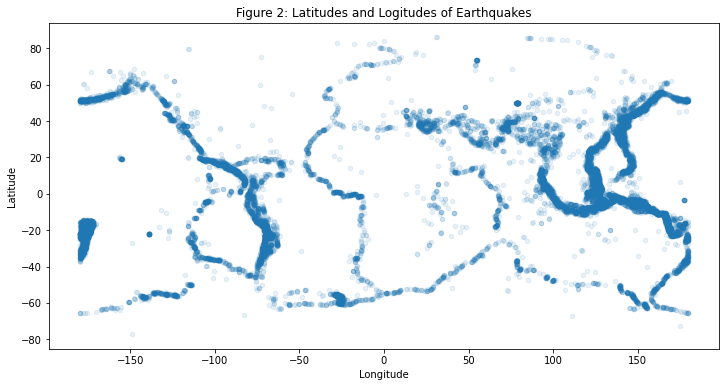

In [71]:
# Visualizing Geographical Data
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(12,6), title="Figure 2: Latitudes and Logitudes of Earthquakes")

# Display raw data on world map
px.set_mapbox_access_token(MAPBOX_ACCESS_KEY)
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Magnitude", size="Magnitude",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=5, zoom=0, title="Figure 1: Significant Earthquakes from 1965 to 2016")
fig.show()

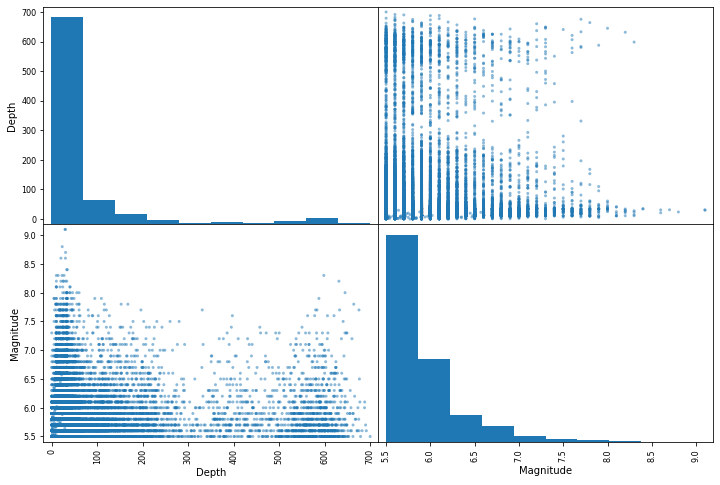

In [72]:
from pandas.plotting import scatter_matrix

# Looking for Correlations
attributes = ["Depth", "Magnitude"]
scatter_matrix(df[attributes], figsize=(12, 8))
corr_matrix = df.corr()

In [73]:
# Correlations of Depth vs other data labels
corr_matrix["Depth"].sort_values(ascending=False)

# There appears to be no significant correlation between 'Depth' and other data labels

Depth        1.000000
Magnitude    0.023432
Latitude    -0.080951
Longitude   -0.085953
Name: Depth, dtype: float64

In [74]:
# Correlations of Magnitude vs other data lables
corr_matrix["Magnitude"].sort_values(ascending=False)

# There appears to be no significant correlation between 'Magnitude' and other data labels

Magnitude    1.000000
Longitude    0.038514
Latitude     0.035055
Depth        0.023432
Name: Magnitude, dtype: float64

In [81]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
